In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import log
from math import exp
import dataframe_image as dfi
from pandas.plotting import table

In [213]:
# reads in flow output data
df = pd.read_csv('output.csv')
df.dtypes

puzzle_name     object
free_spaces      int64
solvable        object
time           float64
nodes            int64
deadend          int64
dtype: object

In [215]:
# keeps solvable puzzles with node pruning
deadend = df.loc[(df['deadend'] == 1) & (df['solvable'] == 's')]
deadend

,puzzle_name,free_spaces,solvable,time,nodes,deadend
0,deadlock_6x6_01,24,s,0.000286,74,1
1,extreme_10x10_01,90,s,1.081124,965527,1
2,extreme_11x11_07,107,s,15.902690,9795187,1
3,extreme_11x11_15,105,s,13.012130,7289839,1
4,extreme_11x11_20,107,s,9.279441,7076023,1
...,...,...,...,...,...,...
99,regular_5x5_01,15,s,0.000038,17,1
100,regular_6x6_01,24,s,0.000299,128,1
101,regular_7x7_01,37,s,0.000444,213,1
102,regular_8x8_01,52,s,0.004675,2219,1


In [216]:
# keeps solvable puzzles without node pruning
no_deadend = df.loc[(df['deadend'] == 0) & (df['solvable'] == 's')]
no_deadend

,puzzle_name,free_spaces,solvable,time,nodes,deadend
105,deadlock_6x6_01,24,s,0.000151,202,0
111,deadlock_6x6_01,24,s,0.000113,202,0
117,deadlock_6x6_01,24,s,0.000108,202,0
123,deadlock_6x6_01,24,s,0.000110,202,0
129,deadlock_6x6_01,24,s,0.000146,202,0
142,extreme_9x9_30,69,s,38.774810,26027479,0
143,regular_5x5_01,15,s,0.000008,18,0
144,regular_6x6_01,24,s,0.000098,283,0
145,regular_7x7_01,37,s,0.001183,3317,0
146,regular_8x8_01,52,s,0.251744,409726,0


In [217]:
# groups by puzzle name, averages each puzzle and sorts
deadend = deadend.groupby(by=['puzzle_name','free_spaces']).mean().sort_values('free_spaces').reset_index()
deadend = deadend.set_index('puzzle_name')
deadend['nodes'] = deadend['nodes'].astype(int)
deadend

,free_spaces,time,nodes,deadend
puzzle_name,,,,
regular_5x5_01,15,0.000033,17,1.0
deadlock_6x6_01,24,0.000119,74,1.0
regular_6x6_01,24,0.000303,128,1.0
regular_7x7_01,37,0.000422,213,1.0
regular_8x8_01,52,0.003868,2219,1.0
extreme_8x8_01,54,0.009096,5932,1.0
regular_9x9_01,63,0.007936,7285,1.0
extreme_9x9_30,69,0.032370,34888,1.0
extreme_9x9_01,73,0.134440,126993,1.0


In [218]:
# groups by puzzle name, averages each puzzle and sorts
no_deadend = no_deadend.groupby(by=['puzzle_name','free_spaces']).mean().sort_values('free_spaces').reset_index()
no_deadend = no_deadend.set_index('puzzle_name')
no_deadend['nodes'] = no_deadend['nodes'].astype(int)
no_deadend

,free_spaces,time,nodes,deadend
puzzle_name,,,,
regular_5x5_01,15,0.000008,18,0.0
deadlock_6x6_01,24,0.000126,202,0.0
regular_6x6_01,24,0.000131,283,0.0
regular_7x7_01,37,0.001518,3317,0.0
regular_8x8_01,52,0.292036,409726,0.0
regular_9x9_01,63,0.401473,549827,0.0
extreme_9x9_30,69,35.743824,26027479,0.0
extreme_9x9_01,73,103.233555,78584155,0.0
jumbo_10x10_01,76,0.193500,317532,0.0


In [219]:
# merges deadend and non-deadend into one dataframe
final = deadend.copy()
final['time_no_deadend'] = no_deadend['time']
final['nodes_no_deadend'] = no_deadend['nodes']
final = final.rename(columns={'time':'time_deadend','nodes':'nodes_deadend'}).drop(columns='deadend')
final

,free_spaces,time_deadend,nodes_deadend,time_no_deadend,nodes_no_deadend
puzzle_name,,,,,
regular_5x5_01,15,0.000033,17,0.000008,18.0
deadlock_6x6_01,24,0.000119,74,0.000126,202.0
regular_6x6_01,24,0.000303,128,0.000131,283.0
regular_7x7_01,37,0.000422,213,0.001518,3317.0
regular_8x8_01,52,0.003868,2219,0.292036,409726.0
extreme_8x8_01,54,0.009096,5932,NaN,NaN
regular_9x9_01,63,0.007936,7285,0.401473,549827.0
extreme_9x9_30,69,0.032370,34888,35.743824,26027479.0
extreme_9x9_01,73,0.134440,126993,103.233555,78584155.0


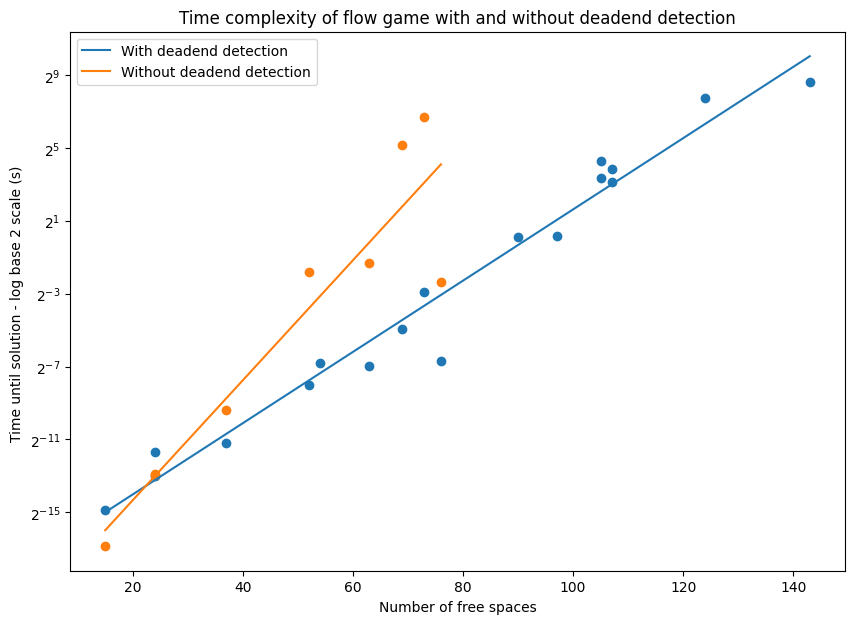

In [220]:
fig1, ax1 = plt.subplots()
# scatter plot
ax1.scatter(final['free_spaces'], final['time_deadend'])
ax1.scatter(final['free_spaces'], final['time_no_deadend'])

x_time_d = final['free_spaces']
y_time_d = final['time_deadend']
y_time_n = final['time_no_deadend'].dropna()
x_time_n = final['free_spaces'][y_time_n.index]

# logarithmic line of best fit
fit_timed = np.polyfit(x_time_d, y_time_d.apply(lambda x: log(x, 2)), 1)
fit_timen = np.polyfit(x_time_n, y_time_n.apply(lambda x: log(x, 2)), 1)
y_timed_fit = x_time_d.apply(lambda x: 2 ** (fit_timed[1] + fit_timed[0] * x))
y_timen_fit = x_time_n.apply(lambda x: 2 ** (fit_timen[1] + fit_timen[0] * x))
ax1.plot(x_time_d, y_timed_fit, label="With deadend detection")
ax1.plot(x_time_n, y_timen_fit, label="Without deadend detection")
ax1.set_yscale('log', base=2)

# plot extras
plt.xlabel('Number of free spaces')
plt.ylabel('Time until solution - log base 2 scale (s) ')
plt.title('Time complexity of flow game with and without deadend detection')
plt.legend(loc="upper left")
fig1.set_figwidth(10)
fig1.set_figheight(7)


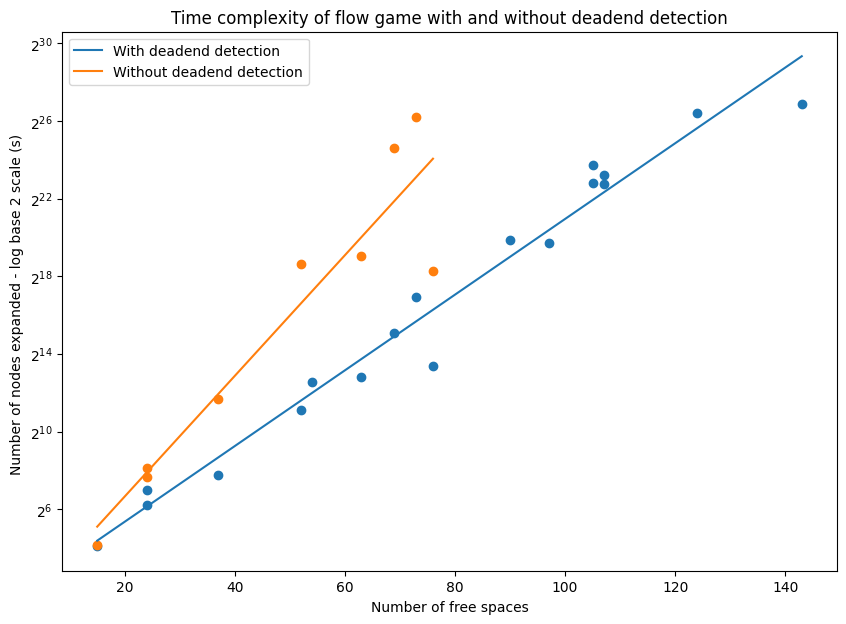

In [221]:
fig2, ax2 = plt.subplots()
# scatter plot
ax2.scatter(final['free_spaces'], final['nodes_deadend'])
ax2.scatter(final['free_spaces'], final['nodes_no_deadend'])
x_node_d = final['free_spaces']
y_node_d = final['nodes_deadend']
y_node_n = final['nodes_no_deadend'].dropna()
x_node_n = final['free_spaces'][y_node_n.index]

# logarithmic line of best fit
fit_noded = np.polyfit(x_node_d, y_node_d.apply(lambda x: log(x, 2)), 1)
fit_noden = np.polyfit(x_node_n, y_node_n.apply(lambda x: log(x, 2)), 1)
y_noded_fit = x_node_d.apply(lambda x: 2 ** (fit_noded[1] + fit_noded[0] * x))
y_noden_fit = x_node_n.apply(lambda x: 2 ** (fit_noden[1] + fit_noden[0] * x))
ax2.plot(x_node_d, y_noded_fit, label="With deadend detection")
ax2.plot(x_node_n, y_noden_fit, label="Without deadend detection")
ax2.set_yscale('log', base=2)

# plot extras
plt.xlabel('Number of free spaces')
plt.ylabel('Number of nodes expanded - log base 2 scale (s) ')
plt.title('Time complexity of flow game with and without deadend detection')
plt.legend(loc="upper left")
fig2.set_figwidth(10)
fig2.set_figheight(7)

In [233]:
# latex table conversion (for report) with updated column names
styled = final.reset_index().rename(columns={'time_deadend':'Time w/ deadend','time_no_deadend':'Time w/o deadend','nodes_deadend':'Nodes expanded w/ deadend','nodes_no_deadend':'Nodes expanded w/o deadend','puzzle_name':'Puzzle name','free_spaces':'Free spaces'})
print(styled.to_latex(index=False, column_format='|l|r|r|r|p{1cm}|r|',caption='Nodes and time data for each puzzle successfully ran', label='data_table'))

\begin{table}
\centering
\caption{Nodes and time data for each puzzle successfully ran}
\label{data_table}
\begin{tabular}{|l|r|r|r|p{1cm}|r|}
\toprule
     Puzzle name &  Free spaces &  Time w/ deadend &  Nodes expanded w/ deadend &  Time w/o deadend &  Nodes expanded w/o deadend \\
\midrule
  regular\_5x5\_01 &           15 &         0.000033 &                         17 &          0.000008 &                        18.0 \\
 deadlock\_6x6\_01 &           24 &         0.000119 &                         74 &          0.000126 &                       202.0 \\
  regular\_6x6\_01 &           24 &         0.000303 &                        128 &          0.000131 &                       283.0 \\
  regular\_7x7\_01 &           37 &         0.000422 &                        213 &          0.001518 &                      3317.0 \\
  regular\_8x8\_01 &           52 &         0.003868 &                       2219 &          0.292036 &                    409726.0 \\
  extreme\_8x8\_01 &           

/var/folders/7g/8pqkhyw95p352q8gs78x7z180000gn/T/ipykernel_8345/2989293759.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(styled.to_latex(index=False, column_format='|l|r|r|r|p{1cm}|r|',caption='Nodes and time data for each puzzle successfully ran', label='data_table'))
